In [2]:
import tensorflow as tf
import tensorflow_hub as tfhub
img_path= '/content/drive/MyDrive/Colab Notebooks/4-1 인공지능/img/sample.jpg'
img= tf.io.read_file(img_path)

In [4]:
img= tf.image.decode_jpeg(img, channels=3)
img= tf.image.convert_image_dtype(img, tf.float32)

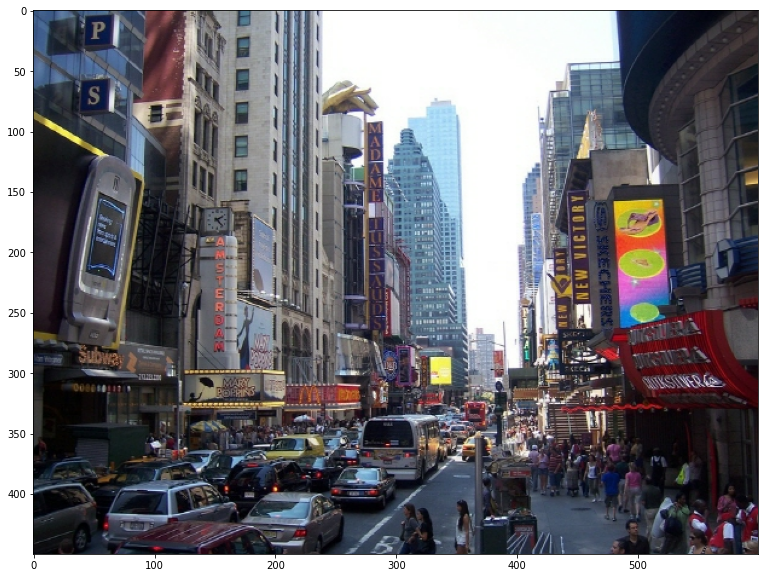

In [5]:
import matplotlib.pyplot as plt
plt.figure(figsize=(15, 10))
plt.imshow(img)

In [7]:
img_input= tf.expand_dims(img, 0)
img_input.shape

TensorShape([1, 450, 600, 3])

In [8]:
model= tfhub.load("https://tfhub.dev/google/faster_rcnn/openimages_v4/inception_resnet_v2/1")

INFO:tensorflow:Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


In [9]:
model.signatures.keys()

KeysView(_SignatureMap({'default': <ConcreteFunction pruned(images) at 0x7F33DDBB2050>}))

In [10]:
obj_detector= model.signatures['default']
obj_detector

<ConcreteFunction pruned(images) at 0x7F33DDBB2050>

In [12]:
result= obj_detector(img_input)
result.keys()

dict_keys(['detection_class_entities', 'detection_class_names', 'detection_class_labels', 'detection_boxes', 'detection_scores'])

In [13]:
len(result['detection_scores'])

100

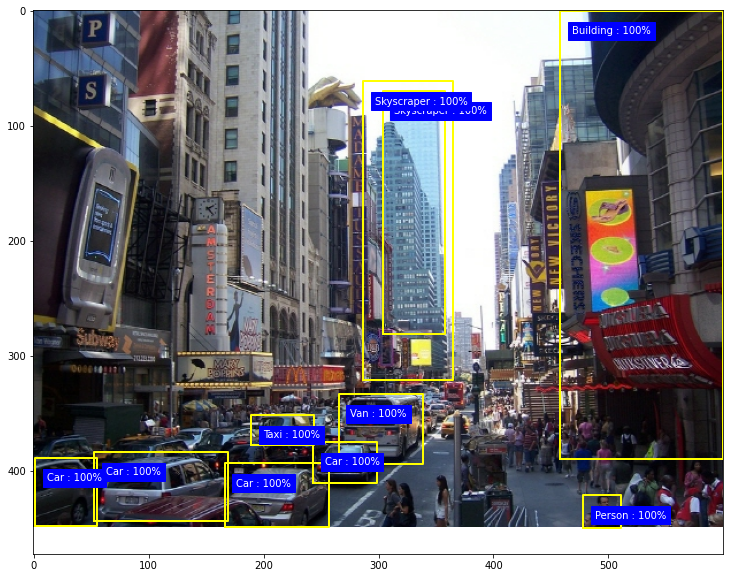

In [14]:
boxes= result['detection_boxes']
labels= result['detection_class_entities']
scores= result['detection_scores']

img_height, img_width = img.shape[0], img.shape[1]

obj_to_detect= 10

plt.figure(figsize=(15, 10))
for i in range(min(obj_to_detect, boxes.shape[0])):
  if scores[i] >= 0.2:
    (ymax, xmin, ymin, xmax)= (boxes[i][0] * img_height, boxes[i][1] * img_width, 
                               boxes[i][2] * img_height, boxes[i][3] * img_width)
    plt.imshow(img)
    plt.plot([xmin, xmax, xmax, xmin, xmin], [ymin, ymin, ymax, ymax, ymin], color='yellow', linewidth=2)
    class_name= labels[i].numpy().decode('utf-8')
    infer_score= int(scores[i].numpy() + 100)
    annotation= "{} : {}%".format(class_name, infer_score)
    plt.text(xmin+10, ymax+20, annotation, color='white', backgroundcolor='blue', fontsize=10)